# Motivation

*https://www.youtube.com/watch?v=m41DWardioc

In Ecology understanding the different abundances of species in any area/ecosystem is important to understand biodiversity and the conservation of ecosystems. Almost universally the distribution of abundances is such that there are many rare species and few abundant species. Again, almost universally the data closely fits a lognormal distribution. Many models for explaining real-world data of lognormal species abundances exist. One such model is a Niche Apportionment Model which here we call 'breaking the stick'. 

A popular co-analogy for 'breaking the stick' is 'crushing the stone'. If a stone is crushed, the distribution of the mass of the pieces is lognormal - there are many small pieces and few (but existing) large pieces. In 'Breaking the stick' we can simplify the analogy to one dimension. We recursively and randomly break segments of the stick. We find out that on average this results in many short segments and few long segments. According to the lecture in the video above the lengths of the segments are distributed lognormally. We seek here to (non-rigorously) investigate that claim and build a stick breaking model.

# Experiment 1

Below a simple method for running experiments in stick breaking and displaying results is coded. We also code a function for displaying the log (base `e`) of the results so that we can visually check if the distribution of those values is normal - hence confirming that the original results are lognormal. 

We use an equally distributed probability to break the stick. I.E. given a segment, it is equally likely that we will break that segment at all positions. 

We use a 'stick' of length one and generate breaks (random numbers) between 0 and 1. The limitation with this is that the range of a lognormal function  is 0->Infinity. When we take the log of the results (all in the range 0->1) we get all negative values and a skewed distribution. By only eyeballing the distribution we can see that it seems to be approaching normal as the number of iterations we run increases.


### Additional Notes

The video linked to above describes both Niche and Neutral models. In niche model species are different. In the neutral model(s) the species are 'the same' in that the model does not invoke any of their real differences in order to explain/predict the data that we see.

Lots of different microscopic models can produce the data we see in the real world. In other words a model such as that presented here can fit the data and in an optimistic case even predict data but we can't yet say that the underlying real world mechanism is the same. That the model fits the data does not prove that the assumptions that went into the model are correct.

In [1]:
# code for running trials and plotting graphs

import random
import copy
import math

from collections import namedtuple, Counter
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


def do_trials(experiment_function, result_function, trials=1000):
    '''
    experiment_function: should return list of results
    result_function: can transform an element of results before appending
    '''
    results = []
    for i in range(trials):
        s = experiment_function()
        for seg in s:
            v = result_function(seg, s)
            results.append(result_function(seg,s))
    return results
    

def plot_experiment(data_function, title=None):
    fig, ax = plt.subplots()
    xs = data_function()
    
    ax.hist(xs, bins=10, alpha=0.5, density=True)
    ax.set_xlabel('x')
    ax.set_ylabel('pdf(x)')
    if title:
        ax.set_title(title)
    ax.grid(True)



In [2]:
# code for Experiment 1

segment = namedtuple('Segment', ['start', 'end'])


def do_break(s):
    seg_break = random.random()
    marker = s.start + ((s.end - s.start) * seg_break)
    return [segment(s.start, marker), segment(marker, s.end)]
    

def break_stick(stick, break_cycles, p_break, break_function=do_break):
    '''
    stick: is a list of segments
    break_cycles: max number of iterations of breaks a stick will undergo
    p_break: probability a segment breaks at all at any iteration
    '''
    stick = copy.deepcopy(stick)
    while break_cycles > 0:
        next_stick = []
        change_made = False
        for segment in stick:
            if random.random() < p_break:
                change_made = True
                next_stick.extend(break_function(segment))
            else:
                next_stick.append(segment)
        if not change_made:
            return stick
        stick = next_stick
        break_cycles -= 1
    return stick
    

def rf_length(seg, s):
    return seg.end - seg.start
    

def rf_log(seg, s):
    return math.log(seg.end-seg.start)

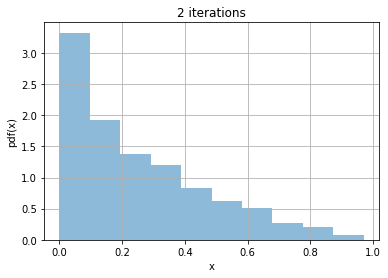

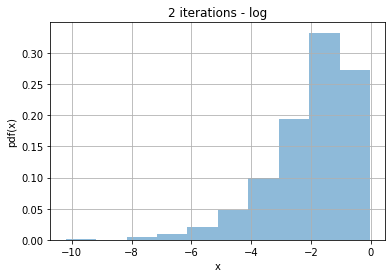

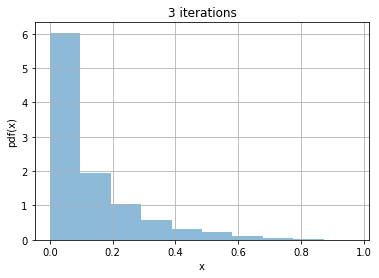

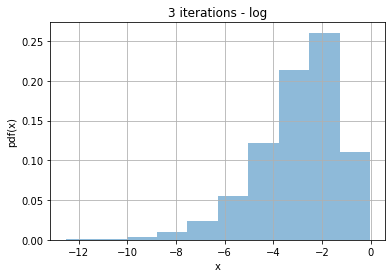

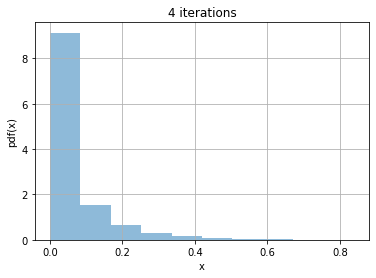

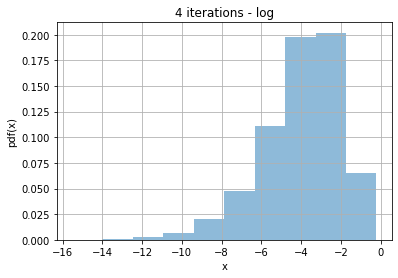

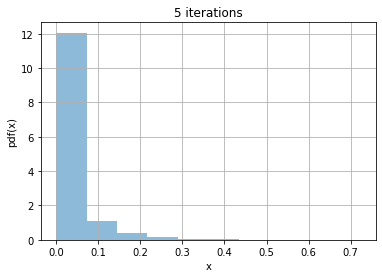

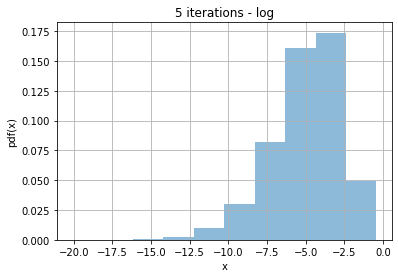

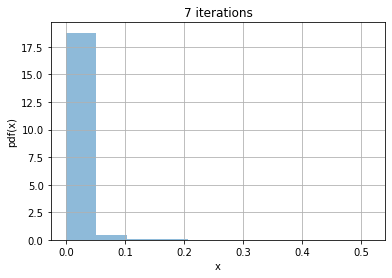

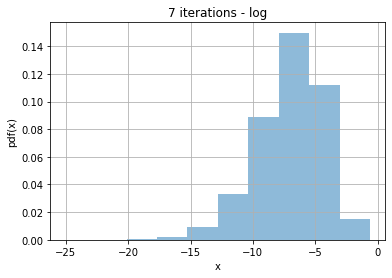

In [3]:
# run experiment 1

from functools import partial


# break_cycles unspec'd
experiment1 = partial(break_stick, stick=[segment(0,1)], p_break=1.0, break_function=do_break)


def create_plot(experiment_function, iterations):
    plot_experiment(
        partial(
            partial(do_trials, partial(experiment_function, break_cycles=iterations), rf_length)),
        '%s iterations'%str(iterations))
    plot_experiment(
        partial(
            partial(do_trials, partial(experiment_function, break_cycles=iterations), rf_log)),
        '%s iterations - log'%str(iterations))
    

create_plot(experiment1, 2)
create_plot(experiment1, 3)
create_plot(experiment1, 4)
create_plot(experiment1, 5)
create_plot(experiment1, 7)


# Experiment 2


In this experiment we set the size of the stick to be an integer value `n` higher than 1. We break the stick into values `>= 1` and plot the distribution of segment sizes. This could be said to correspond more to a real world situation where the number of individuals in any ecosystem/area would be limited and you cannot have less than one individual.

From a visual inspection we can say that the log distributions look more normal and less skewed than those in experiment 1. Similar limitations to experiment 1 apply of course. No matter what integer we choose it fixes the range i.e. not 0->infinity. As we strictly only allow segment lengths >= 1 we never get values `< 0`.


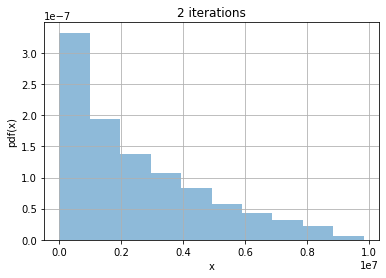

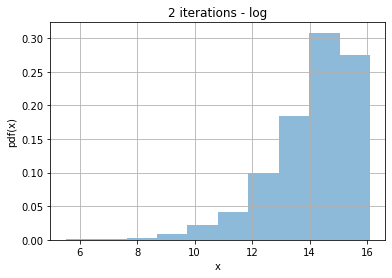

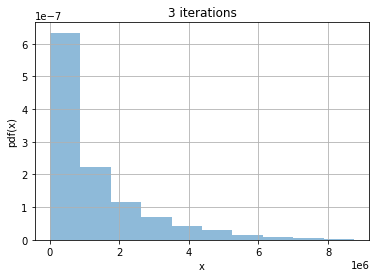

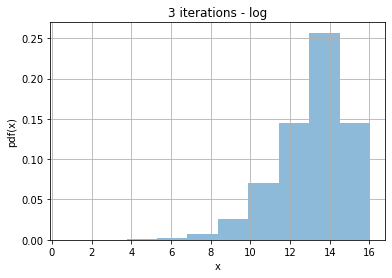

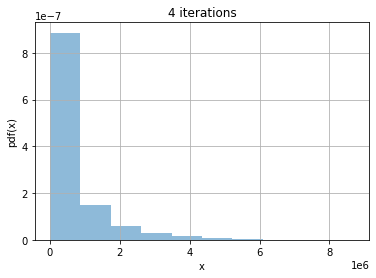

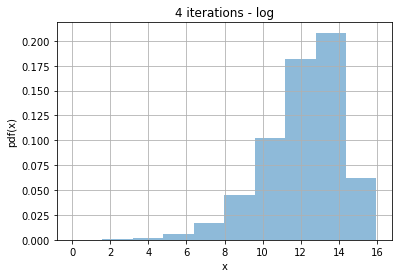

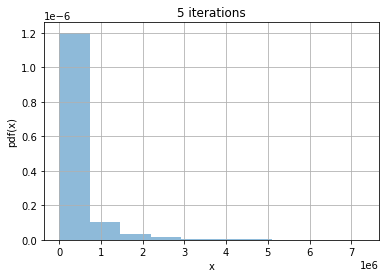

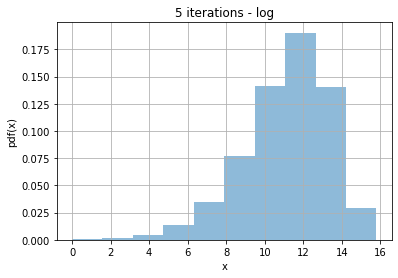

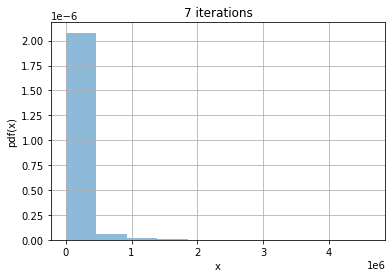

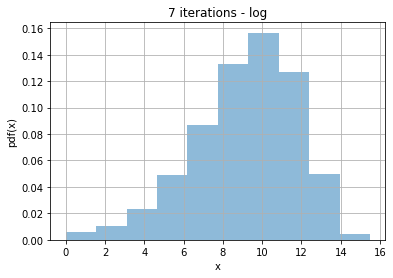

In [4]:

def do_break_int_sizes(s):
    if s.end-s.start == 1:
        return [s]
    seg_break = random.randint(1, s.end - s.start - 1)
    marker = s.start + seg_break
    return [segment(s.start, marker), segment(marker, s.end)]
    

# break_cycles unspec'd
experiment2 = partial(break_stick, stick=[segment(0,10000000)], p_break=1.0, break_function=do_break_int_sizes)


create_plot(experiment2, 2)
create_plot(experiment2, 3)
create_plot(experiment2, 4)
create_plot(experiment2, 5)
create_plot(experiment2, 7)

    


# Future Work

Obviously the above experiments aren't particularly scientific as we define no way of testing the hypothesis (that the stick breaking function produce lognormal distributed values).

We could use a function to transform the end segment sizes to the range 0->Infinity. However, testing the normalness of the distribution of the transformed values could be testing the transformation function more than function to break the stick. Some exploration of how to better model the system so that `Y = ln(X)` is normally distributed is warranted. Surely much work has been done on these methodologies already and it is certain that better methods already exist.

We could test the normalness of the (log) distributions - https://en.wikipedia.org/wiki/Normality_test
